In [1]:
import numpy as np
import pandas as pd
import openturns as ot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
means = [[-3., 0.], [3., 0.], [0., 4.]]
mixture_sample = ot.Sample(0, 2)
n = int(1e3)
for mean in means:
    mixture_sample.add(ot.Normal(mean, [0.8] * 2).getSample(n))

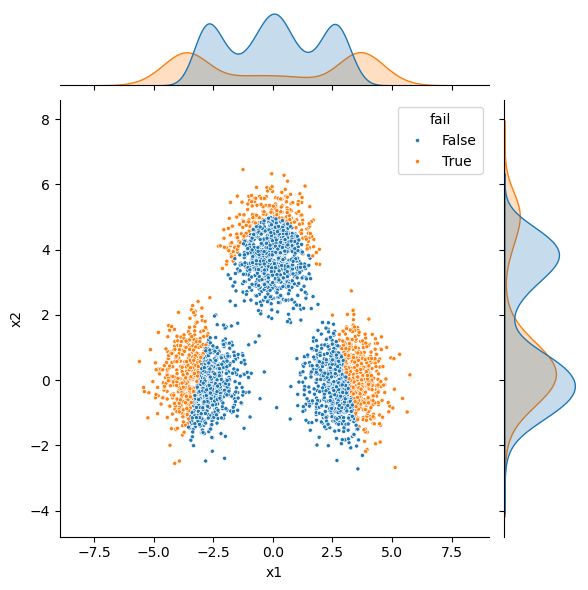

In [3]:
df = pd.DataFrame(np.array(mixture_sample), columns=['x1', 'x2'])
rdf = df.rank() / (3 * n)
df['y'] = 4.0 - (df['x2']-1) - 0.5 * df['x1']**2
df['fail'] = df['y'] < 0
sns.jointplot(df, x='x1', y='x2', hue='fail', marker='.');

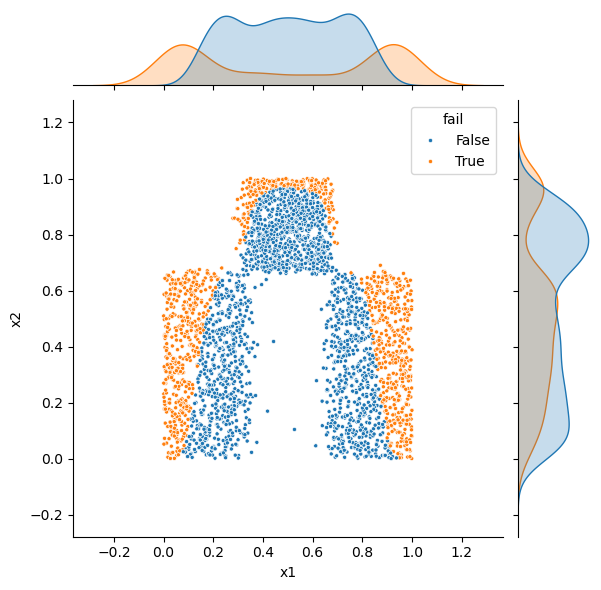

In [4]:
rdf['fail'] = df['fail']
sns.jointplot(rdf, x='x1', y='x2', hue='fail', marker='.');

In [5]:
failed_sample = ot.Sample(df[df['fail']==1][['x1', 'x2']].values)
failed_rsample = ot.Sample(rdf[rdf['fail']==1][['x1', 'x2']].values)

11


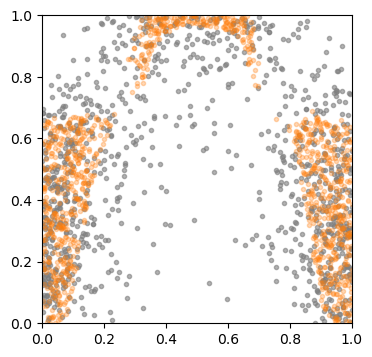

In [6]:
m_amise = ot.BernsteinCopulaFactory.ComputeAMISEBinNumber(failed_sample)
print(m_amise)
failed_copula = ot.EmpiricalBernsteinCopula(failed_rsample, m_amise, True)
ebc_sample = failed_copula.getSample(1000)
plt.figure(figsize=(4,4))
plt.scatter(ebc_sample[:, 0], ebc_sample[:, 1], alpha=0.6, color="C7", marker='.')
plt.scatter(failed_rsample[:, 0], failed_rsample[:, 1], alpha=0.3, color="C1", marker='.')
plt.xlim(0, 1)
plt.ylim(0, 1);

In [7]:
from bancs import optimize_ebc_loglikehood
m_opt = optimize_ebc_loglikehood(failed_sample, kfolds=2)
bernstein_copula = ot.EmpiricalBernsteinCopula(failed_sample, m_opt)
print(m_opt)

109


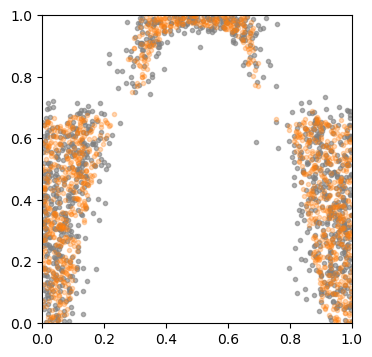

In [8]:
failed_copula = ot.EmpiricalBernsteinCopula(failed_rsample, m_opt, True)
ebc_sample = failed_copula.getSample(1000)
plt.figure(figsize=(4,4))
plt.scatter(ebc_sample[:, 0], ebc_sample[:, 1], alpha=0.6, color="C7", marker='.')
plt.scatter(failed_rsample[:, 0], failed_rsample[:, 1], alpha=0.3, color="C1", marker='.')
plt.xlim(0, 1)
plt.ylim(0, 1);

41


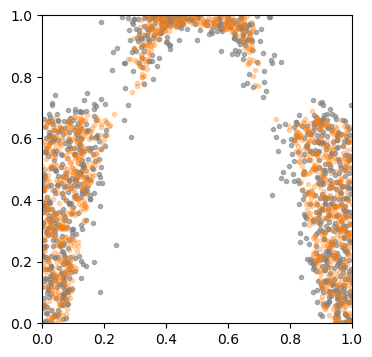

In [10]:
m_kl = ot.BernsteinCopulaFactory.ComputePenalizedCsiszarDivergenceBinNumber(failed_rsample, ot.SymbolicFunction(['t'], ['t * ln(t)']))
print(m_kl)
ebc_sample = failed_copula.getSample(1000)
plt.figure(figsize=(4,4))
plt.scatter(ebc_sample[:, 0], ebc_sample[:, 1], alpha=0.6, color="C7", marker='.')
plt.scatter(failed_rsample[:, 0], failed_rsample[:, 1], alpha=0.3, color="C1", marker='.')
plt.xlim(0, 1)
plt.ylim(0, 1);